# Technology shock - Further comments

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find IRF](#toc2_)    
- 3. [Figures](#toc3_)    
  - 3.1. [Sensitivity analysis wrt price-flexibility](#toc3_1_)    
    - 3.1.1. [Production firms](#toc3_1_1_)    
    - 3.1.2. [Phillips-curve](#toc3_1_2_)    
    - 3.1.3. [Investments](#toc3_1_3_)    
  - 3.2. [Effect on the Labor agency, Labor search & match, and Wages](#toc3_2_)    
  - 3.3. [Effect on Government](#toc3_3_)    
  - 3.4. [Effect on Consumption](#toc3_4_)    
    - 3.4.1. [Bequests and savings](#toc3_4_1_)    
  - 3.5. [Foreign economy](#toc3_5_)    
  - 3.6. [Long term](#toc3_6_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline') 

**Unpack namespaces:**

In [3]:
par = model.par                 
ss = model.ss                  
sol = model.sol                

**Define sensitivity parameter and values:**

In [4]:
parameter= 'gamma'                                       # set parameter 
parameter_values = [0.,100.0, 150.]                      # set parameter values
models = model.multi_model(parameter,parameter_values)   # create one model for each value

model compiled, 1.0 mins 12 secs
Jacobian calculated in 3.5 secs
model compiled, 0.1 secs
Jacobian calculated in 3.4 secs
model compiled, 0.1 secs
Jacobian calculated in 3.4 secs


## 2. <a id='toc2_'></a>[Find IRF](#toc0_)

**Define shock:**

In [5]:
Tshock = 50                                                     # length of shock
persistence = np.array([0.80**np.arange(Tshock)])               # persistence of shock       
persistence = persistence.reshape((Tshock,1)) 

In [6]:
for model_ in models:
    model_.set_exo_ss()                                                  
    model_.set_unknowns_ss()                                             
    model_.sol.Gamma[:Tshock,:] = model_.ss.Gamma*(1 + 0.01*persistence)   # shock to technology parameter
    model_.find_IRF()                                                    

initial:
t1-t0 = 0.07201 secs
it = 5
    max. abs. error = 3.41e-12
    3.58e-14 in A_R_ini_error
    1.64e-15 in Aq_diff
    4.36e-14 in FOC_capital_agency
    9.06e-14 in FOC_K_ell
    3.41e-12 in mkt_clearing
    3.24e-14 in PC

solve: t1-t0 = 0.07706 secs
evaluate + update: t3-t2 = 0.15012 secs
initial:
t1-t0 = 0.07906 secs
it = 6
    max. abs. error = 1.43e-11
    6.48e-13 in A_R_ini_error
    2.92e-14 in Aq_diff
    2.63e-14 in FOC_capital_agency
    1.43e-11 in FOC_K_ell
    6.93e-12 in mkt_clearing
    1.96e-13 in PC

solve: t1-t0 = 0.07806 secs
evaluate + update: t3-t2 = 0.20717 secs
initial:
t1-t0 = 0.07806 secs
it = 6
    max. abs. error = 5.33e-11
    2.25e-12 in A_R_ini_error
    7.99e-14 in Aq_diff
    8.26e-14 in FOC_capital_agency
    5.33e-11 in FOC_K_ell
    1.27e-11 in mkt_clearing
    1.03e-12 in PC

solve: t1-t0 = 0.07806 secs
evaluate + update: t3-t2 = 0.14912 secs


## 3. <a id='toc3_'></a>[Figures](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Sensitivity analysis wrt price-flexibility](#toc0_)

#### 3.1.1. <a id='toc3_1_1_'></a>[Production firms](#toc0_)

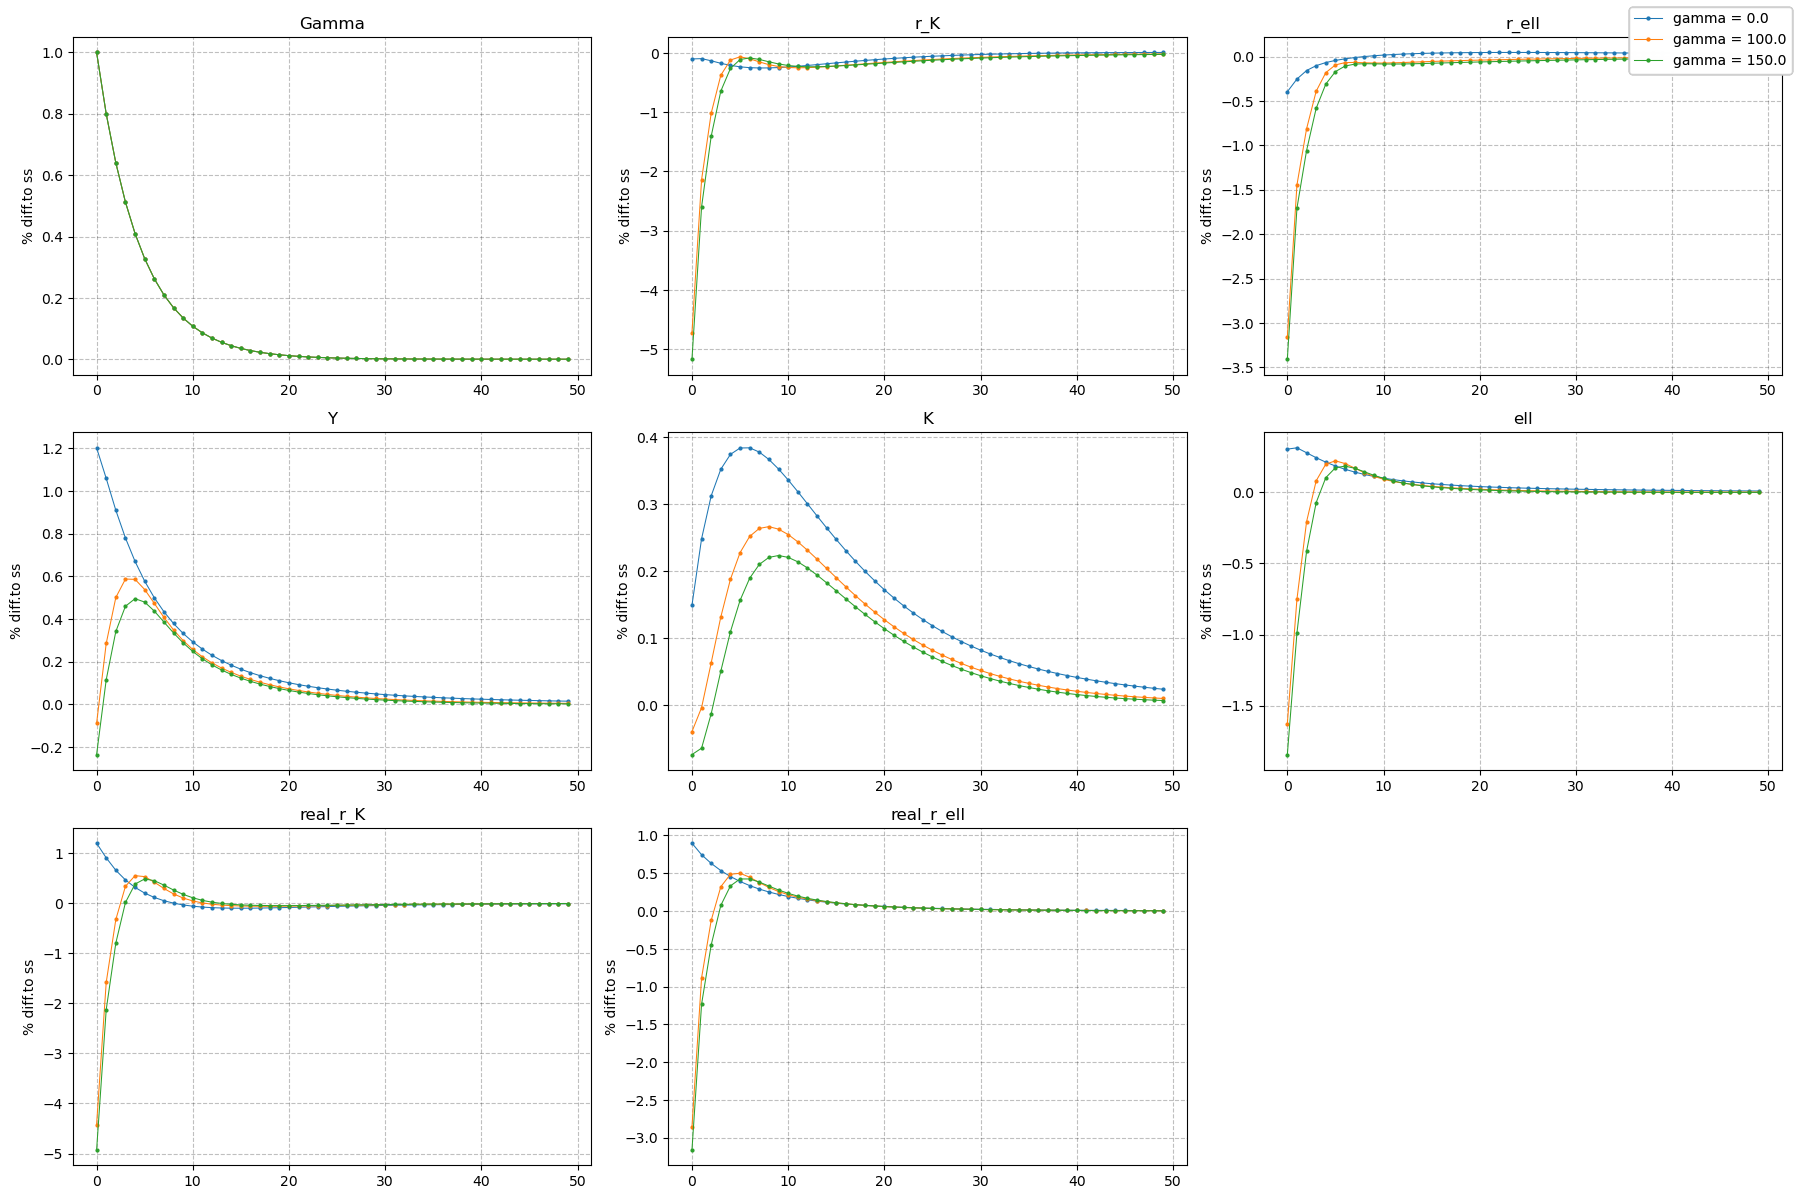

In [7]:
model.plot_IRF_models(models,parameter,varlist=['Gamma','r_K','r_ell','Y','K','ell','real_r_K','real_r_ell'])

#### 3.1.2. <a id='toc3_1_2_'></a>[Phillips-curve](#toc0_)

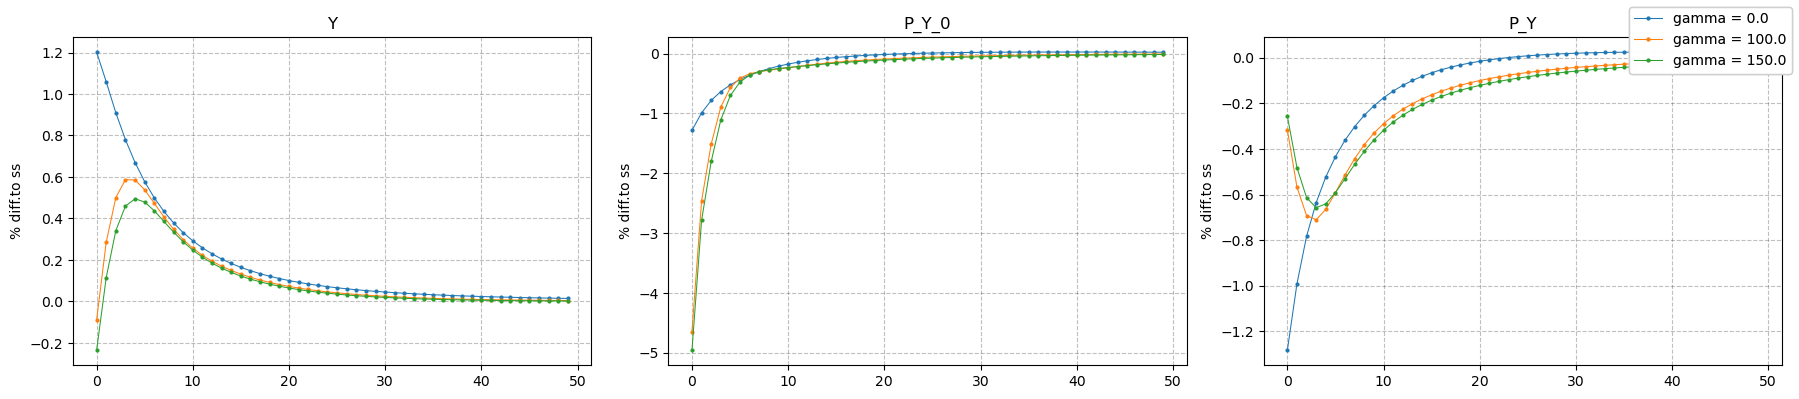

In [8]:
model.plot_IRF_models(models,parameter,varlist=['Y','P_Y_0','P_Y'])

#### 3.1.3. <a id='toc3_1_3_'></a>[Investments](#toc0_)

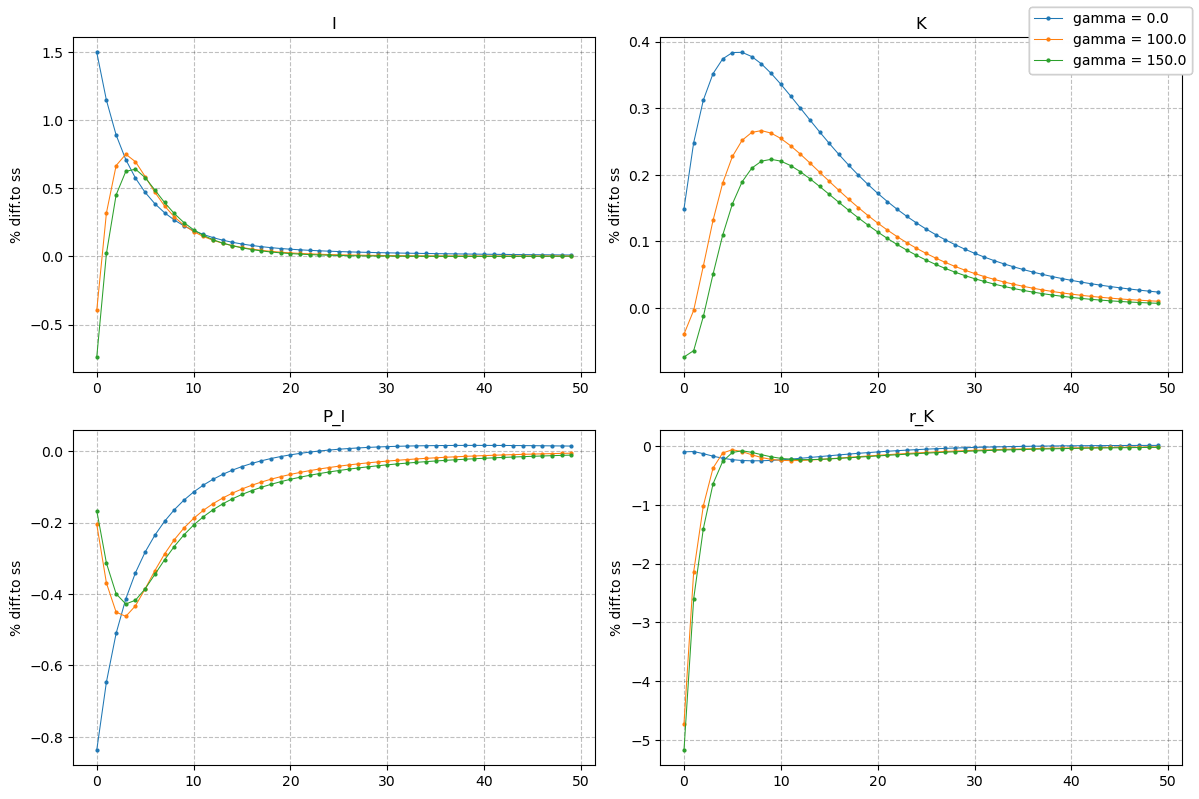

In [9]:
model.plot_IRF_models(models,parameter,varlist=['I','K','P_I','r_K'],ncol=2)

### 3.2. <a id='toc3_2_'></a>[Effect on the Labor agency, Labor search & match, and Wages](#toc0_)

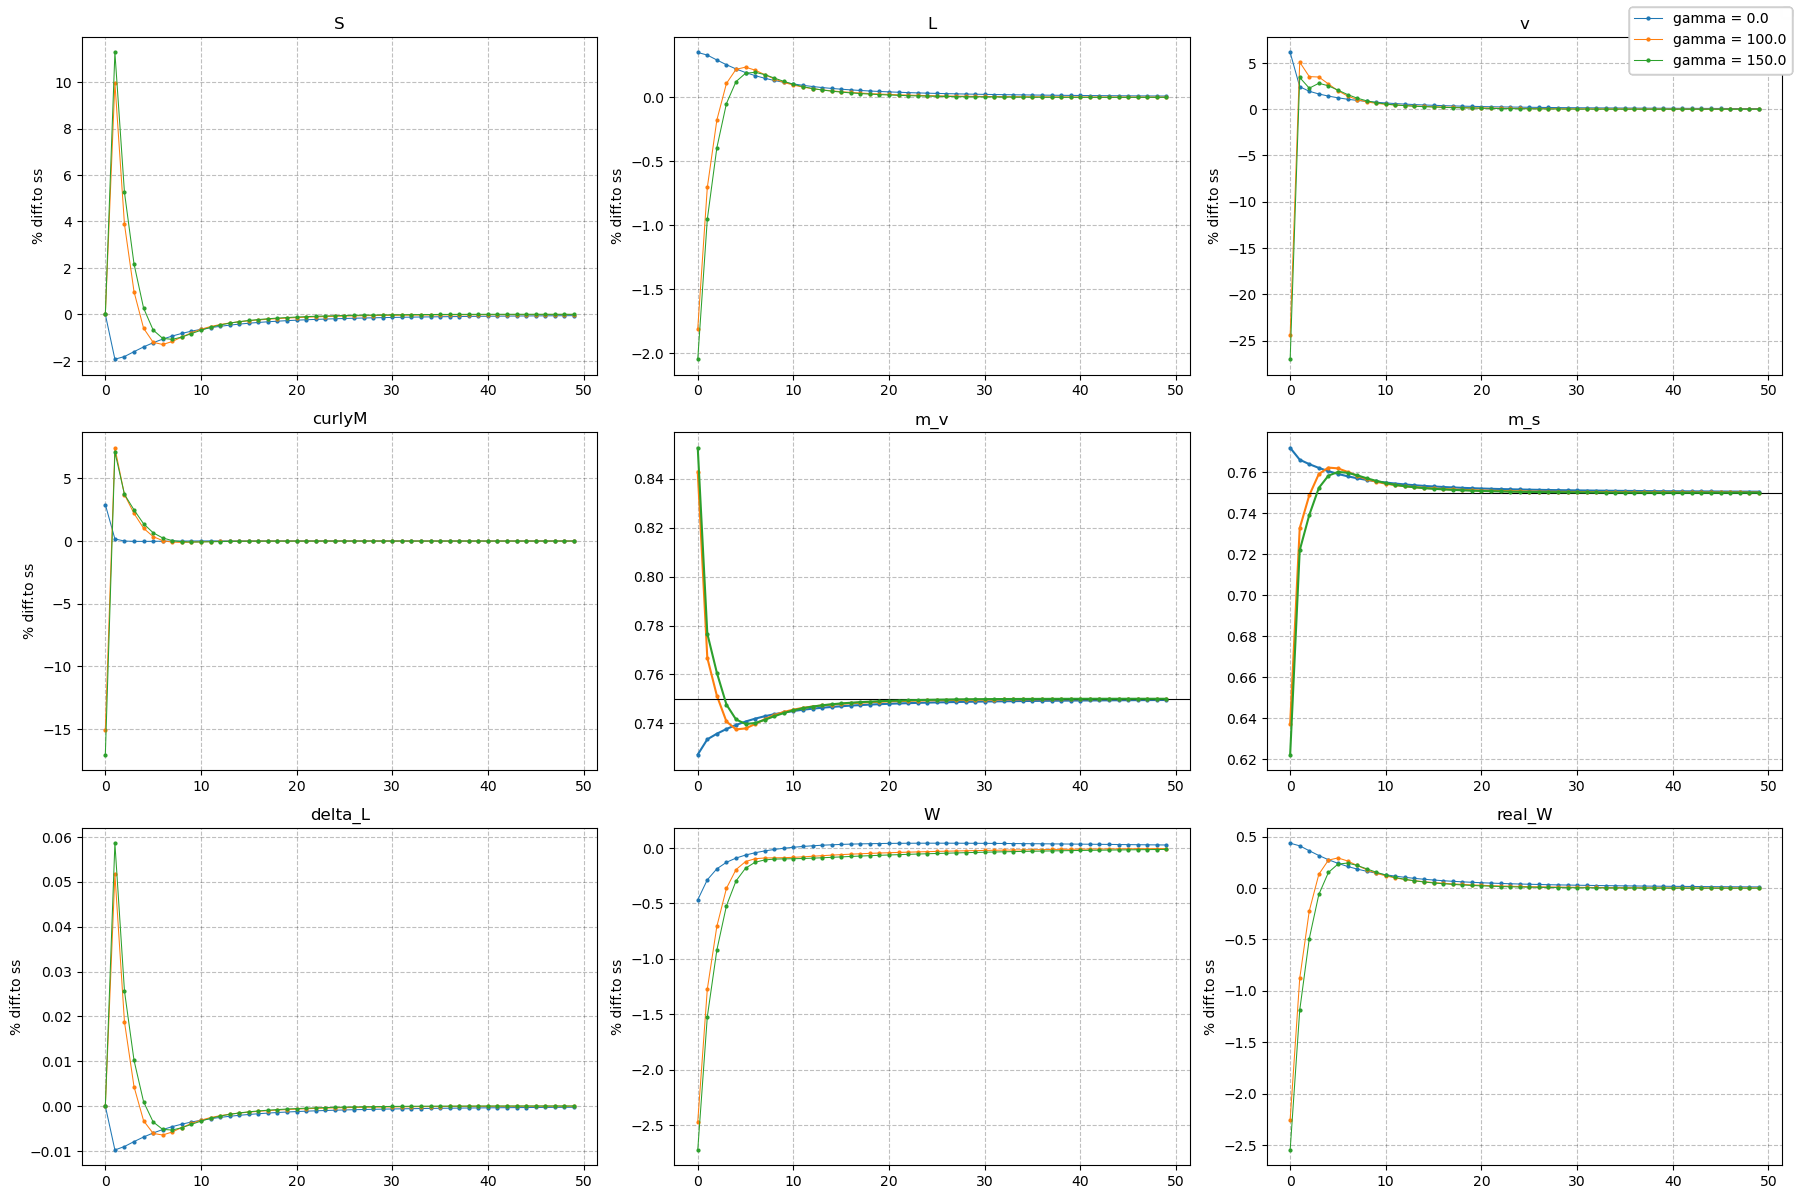

In [10]:
model.plot_IRF_models(models,parameter,varlist=['S','L','v','curlyM','m_v','m_s','delta_L','W','real_W'],abs=['m_v','m_s'])

### 3.3. <a id='toc3_3_'></a>[Effect on Government](#toc0_)

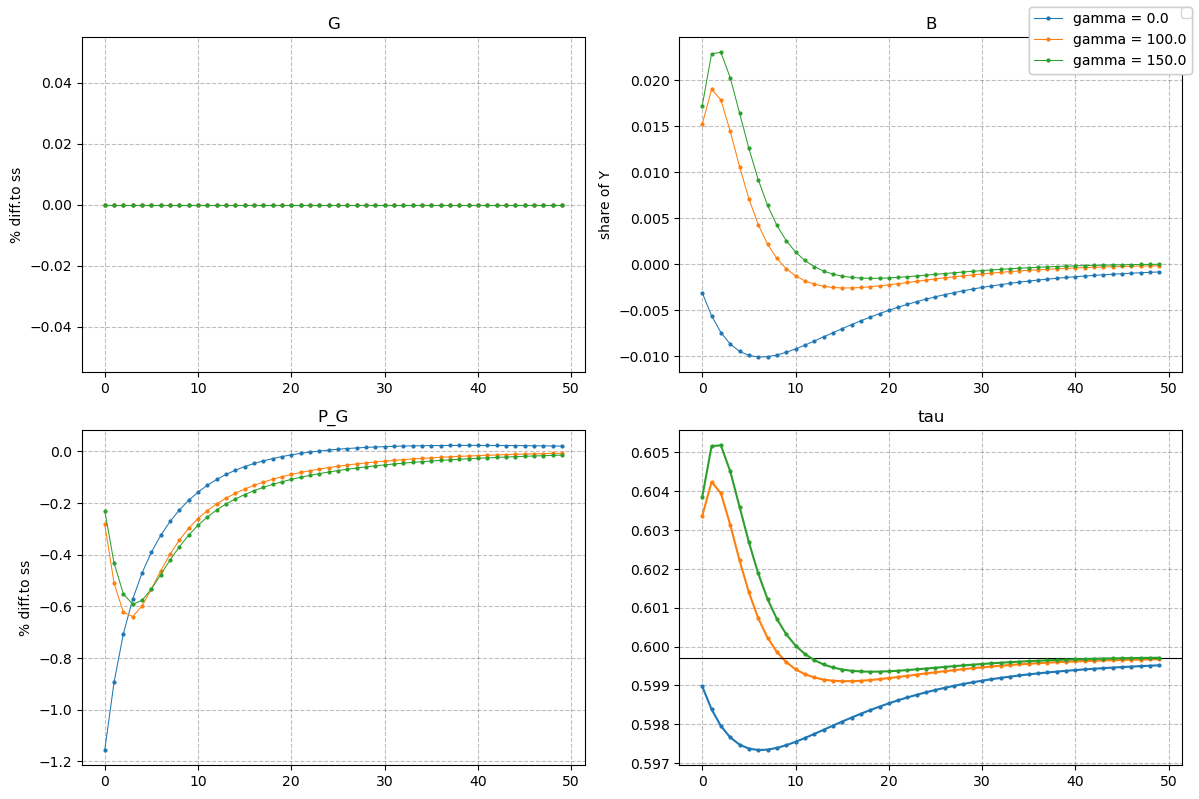

In [11]:
model.plot_IRF_models(models,parameter,varlist=['G','B','P_G','tau'], ncol=2,abs=['tau'],Y_share=['B'])

### 3.4. <a id='toc3_4_'></a>[Effect on Consumption](#toc0_)

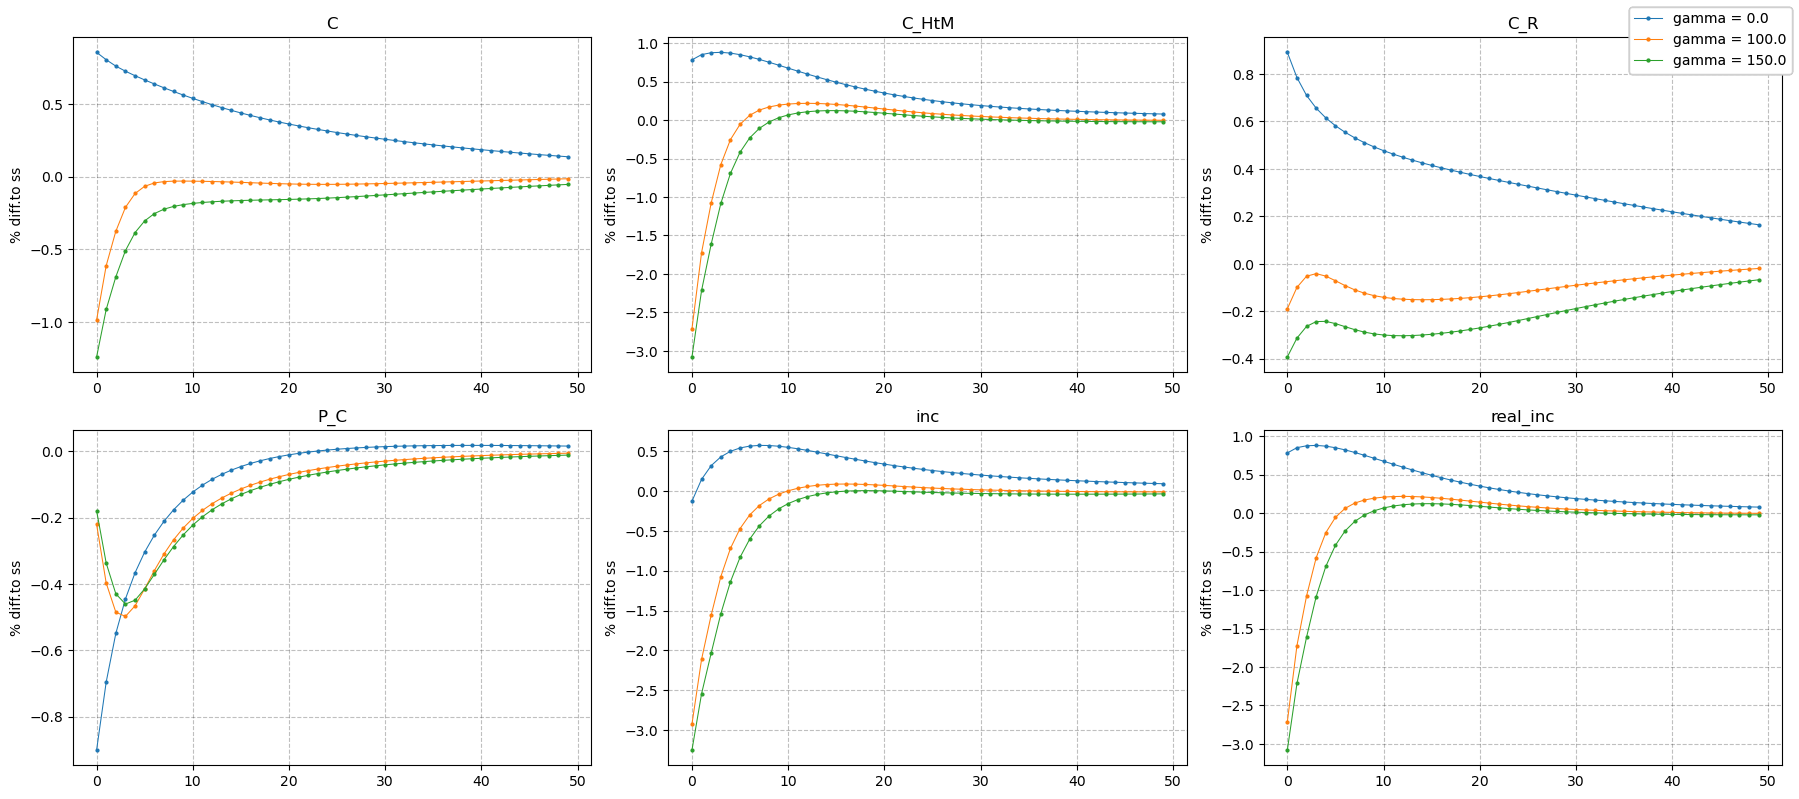

In [12]:
model.plot_IRF_models(models,parameter,varlist=['C','C_HtM','C_R','P_C','inc','real_inc'])

#### 3.4.1. <a id='toc3_4_1_'></a>[Bequests and savings](#toc0_)

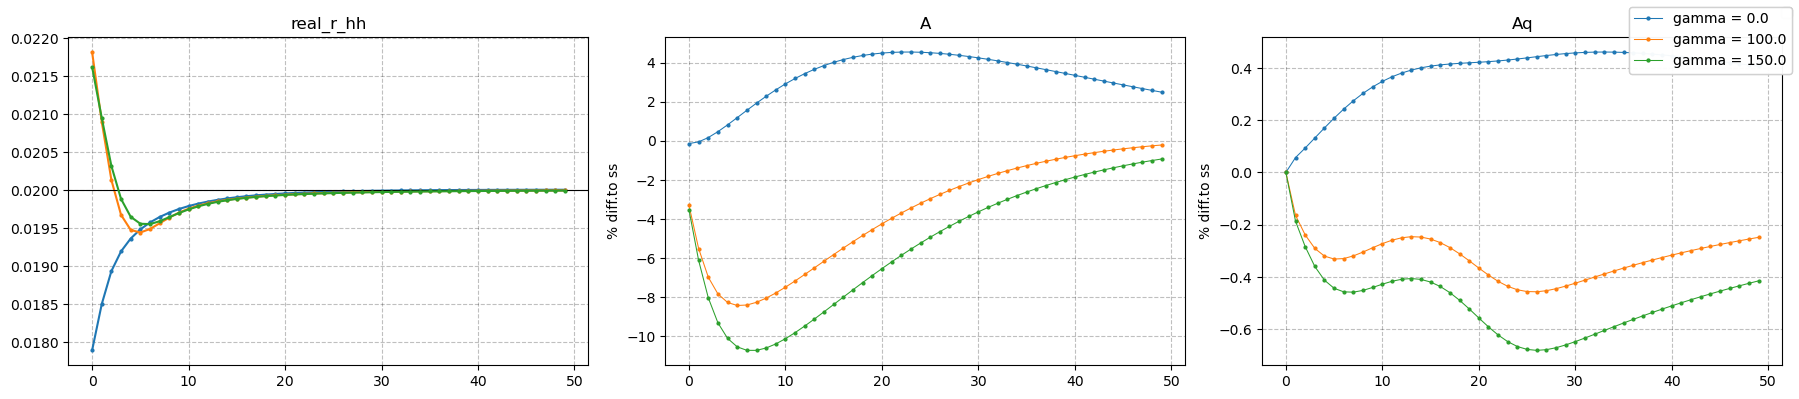

In [13]:
model.plot_IRF_models(models,parameter,varlist=['real_r_hh','A','Aq'],abs=['real_r_hh'])

### 3.5. <a id='toc3_5_'></a>[Foreign economy](#toc0_)

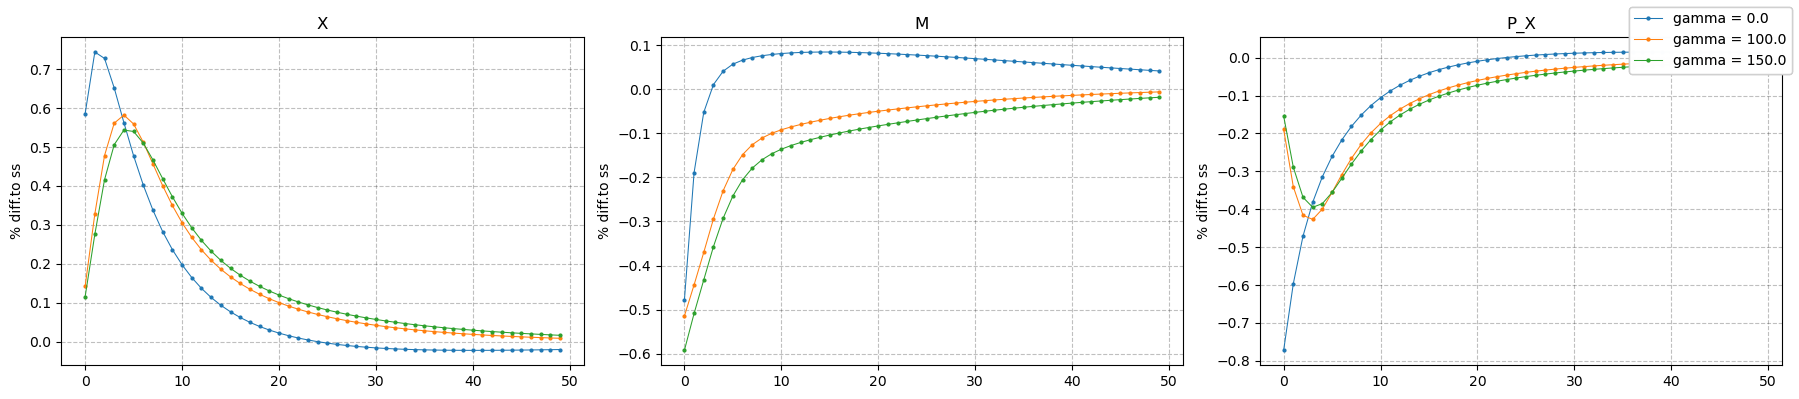

In [14]:
model.plot_IRF_models(models,parameter,varlist=['X','M','P_X'])

### 3.6. <a id='toc3_6_'></a>[Long term](#toc0_)

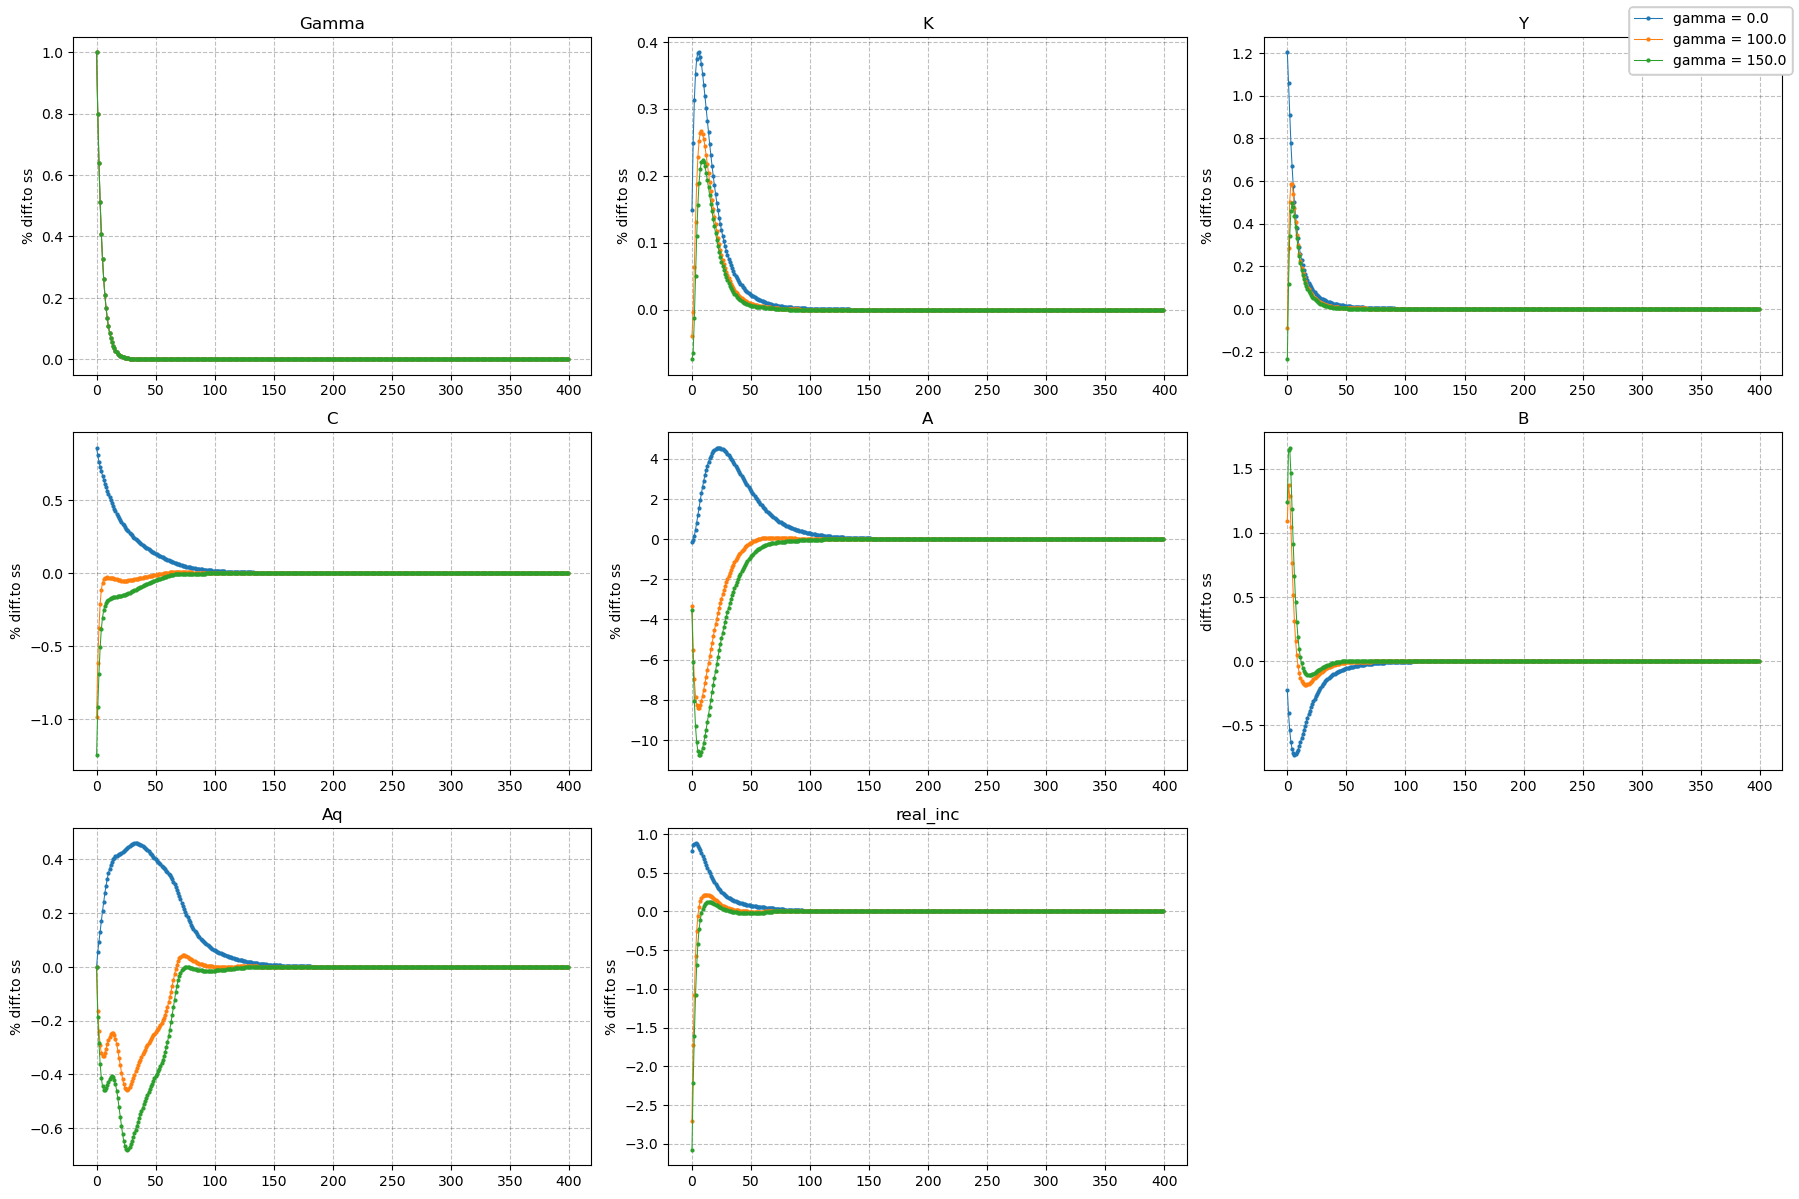

In [15]:
model.plot_IRF_models(models,parameter,varlist=['Gamma','K','Y','C','A','B','Aq','real_inc'],T_IRF=par.T)